In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [7]:
# Define the function
def custom_function(x):
    return (np.sin(np.tan(np.log2(x) * x)) +
            np.arctan(np.log2(x * (1 / np.cos(np.radians(30))))) +
            (x * np.exp(np.tan(np.cos(x) * np.sin(x * 1.43)))))

In [10]:
# Generate dataset
X = np.linspace(0.1, 10, 1000)
y = custom_function(X)

In [11]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Reshape for the neural network
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [13]:
# making neural network
inputs = keras.Input(shape=(1,))
x = layers.BatchNormalization()(inputs)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

In [14]:
# lets compile the model guys
model.compile(
    loss=keras.losses.MeanSquaredError(),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=[keras.metrics.MeanSquaredError(), keras.metrics.MeanAbsoluteError()],
)

In [16]:
# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=500, validation_split=0.2)

# Evaluate the model
results = model.evaluate(X_test, y_test, batch_size=32, verbose=2)

# predict the outcome
y_pred = model.predict(X_test)

Epoch 1/500
20/20 [==============================] - 0s 16ms/step - loss: 8.7410 - mean_squared_error: 8.7410 - mean_absolute_error: 2.3527 - val_loss: 4.5693 - val_mean_squared_error: 4.5693 - val_mean_absolute_error: 1.7061
Epoch 2/500
20/20 [==============================] - 0s 10ms/step - loss: 9.3236 - mean_squared_error: 9.3236 - mean_absolute_error: 2.4674 - val_loss: 4.8867 - val_mean_squared_error: 4.8867 - val_mean_absolute_error: 1.8318
Epoch 3/500
20/20 [==============================] - 0s 15ms/step - loss: 8.1669 - mean_squared_error: 8.1669 - mean_absolute_error: 2.2795 - val_loss: 4.5521 - val_mean_squared_error: 4.5521 - val_mean_absolute_error: 1.7291
Epoch 4/500
20/20 [==============================] - 0s 21ms/step - loss: 8.6994 - mean_squared_error: 8.6994 - mean_absolute_error: 2.2929 - val_loss: 4.8063 - val_mean_squared_error: 4.8063 - val_mean_absolute_error: 1.6917
Epoch 5/500
20/20 [==============================] - 0s 18ms/step - loss: 10.3117 - mean_squared

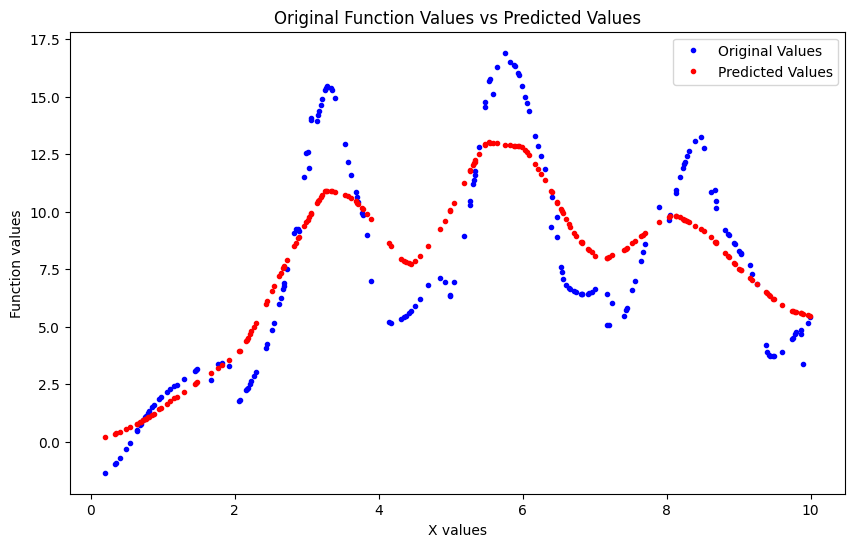

In [17]:
# Plot the original function values vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(X_test, y_test, 'b.', label='Original Values')
plt.plot(X_test, y_pred, 'r.', label='Predicted Values')
plt.title('Original Function Values vs Predicted Values')
plt.xlabel('X values')
plt.ylabel('Function values')
plt.legend()
plt.show()